In [1]:
import diagonalizer
from diagonalizer import diagonalize_1D, density_plot_1D, pSweep_1D, spectrum_plot_1D, FermiVelocityZQL

import numpy as np
from numpy import pi
from copy import copy
# for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt

#Some global and default parameters
SitesCount_XDefault = 800
fsys_1D = diagonalizer.FinalizedSystem_1D(SitesCount_XDefault)

#The parameters with dimension of energy are measured in units of t
#The lattice parameters (apart from the number of lattice sites) seem to be the same as in Fig.1 of Baireuther et al. 16
#lBinv2 = a_0^2 / l_B^2, where a_0 is the lattice spacing, lB is the magnetic length
ParametersDefault = diagonalizer.SimpleNamespace( tp=2., t=1., tzp=1., tz=1., M0=-0.3, FermiEnergy = 0., \
                     betaz=1.2, b0=0.1, pzNode2 = -0.6314028, \
                     Rescale_hop0 = 1.0, Rescale_onsite0 = 1.0, Rescale_onsite1 = 1.0, \
                     EnergyNode2 = 0.049189807,
                     lBinv2=0., x_shift= (SitesCount_XDefault - 1.)/2., \
                     EigenvectorsCount = 50, EnergyPrecision = 10**(-5), WavefunctionComponents = 4, \
                     py = 0., pz = 0. )

pzMin = -1
pzMax = 1
pzCount = 30

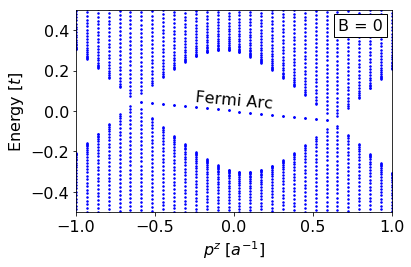

In [2]:
fsys_300 = diagonalizer.FinalizedSystem_1D(300)
params = copy(ParametersDefault)

evals, evecs = pSweep_1D(fsys_300, params, pzMin, pzMax, pCount=pzCount, yORzSweep = 'pzSweep')
plt = spectrum_plot_1D(evals,pzMin,pzMax,pzCount, ShowPlot = False)
plt.xlabel('$p^z \; [a^{-1}]$')
plt.ylabel('Energy $[t]$')
plt.ylim(-0.5, 0.5)
plt.text(0.8, 0.4, 'B = 0', horizontalalignment='center', bbox=dict(facecolor='white', alpha=1.))
plt.text(0., 0.05, 'Fermi Arc', horizontalalignment='center', rotation = -5.)
plt.tight_layout()
plt.savefig('images/WeylCones_BBLSet2.eps')
plt.show()

del fsys_300, params, evals, evecs

## Extraction of the z-velocity of the Fermi arcs

### Extraction of the velocity for $p^z$ around a Weyl node

In [3]:
fsys_finerResolution = diagonalizer.FinalizedSystem_1D(8000)
params = copy(ParametersDefault)

params.pz = params.pzNode2
params.FermiEnergy = params.EnergyNode2
params.EigenvectorsCount = 4
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals, 'while the expected Weyl-node energy is', params.EnergyNode2)


params.pz = params.pzNode2 + 0.01
params.FermiEnergy = params.EnergyNode2
params.EigenvectorsCount = 4
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)


params.pz = params.pzNode2 + 0.05
params.FermiEnergy = params.EnergyNode2
params.EigenvectorsCount = 4
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)


#The extraction of the FA spectrum is made manually so far
print((0.04851469 - params.EnergyNode2)/0.01)
print((0.0457664 - params.EnergyNode2)/0.05)


del fsys_finerResolution, params, evals, evecs

[ 0.04799216  0.04877692  0.04956169  0.05034646] while the expected Weyl-node energy is 0.049189807
[ 0.04851469  0.04851469  0.05599382  0.05613517]
[ 0.0457664   0.0457664   0.08269876  0.08272621]
-0.06751170000000029
-0.06846814000000007


### Extraction of the velocity for $p^z$ in between the Weyl nodes (TO REVISE: maybe it is better to Taylor-expand around $p^z=0$ instead?)

In [43]:
params = copy(ParametersDefault)

#If I make 8000 sites instead of 7000, the numerical error appears somehow 
fsys_finerResolution = diagonalizer.FinalizedSystem_1D(7000)
params.pz = 0.
params.FermiEnergy = 0.
params.EigenvectorsCount = 4
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)


fsys_finerResolution = diagonalizer.FinalizedSystem_1D(8000)
params.pz = 0.05
params.FermiEnergy = 0.
params.EigenvectorsCount = 4
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)


#The extraction of the FA spectrum is made manually so far
print((-0.00416493)/0.05)


del fsys_finerResolution, params, evals, evecs

[ -2.95881015e-01   5.08635444e-19   9.20209656e-18   2.95910607e-01]
[-0.00416493 -0.00416493  0.2849755   0.28503678]
-0.08329859999999999


### The FA spectrum is odd wrt $(p^z,p^y) \to (-p^z,-p^y)$

In [76]:
params = copy(ParametersDefault)

fsys_finerResolution = diagonalizer.FinalizedSystem_1D(1000)
params.EigenvectorsCount = 4

params.FermiEnergy = 0.
params.pz = 0.3
params.py = 0.1
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)

params.FermiEnergy = 0.
params.pz = -0.3
params.py = -0.1
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)


params.EigenvectorsCount = 15
params.FermiEnergy = 0.0
params.pz = 0.3
params.py = 0.2
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)


params.EigenvectorsCount = 15
params.FermiEnergy = 0.0
params.pz = -0.3
params.py = -0.2
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)


del fsys_finerResolution, params, evals, evecs

[-0.22359902  0.17434565  0.2524964   0.25270577]
[-0.25270629 -0.25249908 -0.17434565  0.22359902]
[-0.42058329  0.37132993  0.4149784   0.41511229  0.41533535  0.4156474
  0.41604823  0.41653755  0.41711503  0.41778026  0.41853279  0.41937212
  0.42029765  0.42130882  0.42240559]
[-0.42240524 -0.4213089  -0.42029771 -0.41937223 -0.4185328  -0.41778026
 -0.41711503 -0.41653755 -0.41604823 -0.4156474  -0.41533535 -0.41511229
 -0.4149784  -0.37132993  0.42058329]


### Somehow the FA spectrum is additively separable wrt $p^z$ and $p^y$, even at the level of the microscopic theory!

In [140]:
params = copy(ParametersDefault)

fsys_finerResolution = diagonalizer.FinalizedSystem_1D(1000)
params.EigenvectorsCount = 4

params.FermiEnergy = 0.
params.pz = -0.1
params.py = 0.
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)

params.FermiEnergy = 0.
params.pz = 0.
params.py = 0.05
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)

params.pz = -0.1
params.py = 0.05
params.FermiEnergy = -0.1
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)
print(-0.09961066+0.00831945)

params.FermiEnergy = 0.1
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)
print(0.09961066+0.00831945)


del fsys_finerResolution, params, evals, evecs

[-0.26941774 -0.26919804  0.00831945  0.00831945]
[-0.31331972 -0.09961066  0.09961066  0.31331672]
[-0.28761516 -0.28727505 -0.28707223 -0.0912912 ]
-0.09129121
[-0.0912912   0.10793011  0.31887111  0.31907523]
0.10793011000000001


## Deformation of the boundary condition

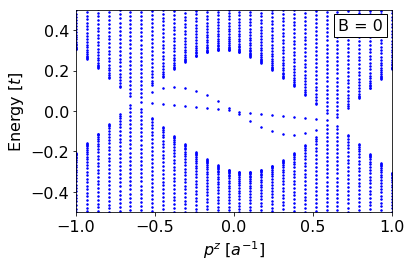

In [3]:
fsys_300 = diagonalizer.FinalizedSystem_1D(300)

params = copy(ParametersDefault)
params.Rescale_b0_0 = 10.0

evals, evecs = pSweep_1D( fsys_300, params, pzMin, pzMax, pCount=pzCount, yORzSweep = 'pzSweep')
plt = spectrum_plot_1D(evals,pzMin,pzMax,pzCount, ShowPlot = False)
plt.xlabel('$p^z \; [a^{-1}]$')
plt.ylabel('Energy $[t]$')
plt.ylim(-0.5, 0.5)
plt.text(0.8, 0.4, 'B = 0', horizontalalignment='center', bbox=dict(facecolor='white', alpha=1.))
# plt.text(0., 0.05, 'Fermi Arc', horizontalalignment='center', rotation = -5.)
plt.tight_layout()
plt.savefig('images/WeylCones_BBLSet2_DeformedBoundary.eps')
plt.show()

del fsys_300, params, evals, evecs

### Extraction of the velocity for $p^z$ around a Weyl node

In [9]:
fsys_finerResolution = diagonalizer.FinalizedSystem_1D(8000)
params = copy(ParametersDefault)
params.Rescale_b0_0 = 10.0
# params.Rescale_onsite0 = 3.
# params.Rescale_onsite1 = 3.

params.pz = params.pzNode2
params.FermiEnergy = params.EnergyNode2
params.EigenvectorsCount = 4
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals, 'while the expected Weyl-node energy is', params.EnergyNode2)


params.pz = params.pzNode2 + 0.05
params.FermiEnergy = params.EnergyNode2
params.EigenvectorsCount = 6
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)


#The extraction of the FA spectrum is made manually so far
print((0.07119143 - params.EnergyNode2)/0.05)
print((0.0457664 - params.EnergyNode2)/0.05)


del fsys_finerResolution, params, evals, evecs

[ 0.04809845  0.04888322  0.04966799  0.05045276] while the expected Weyl-node energy is 0.049189807
[ 0.0457664   0.07119143  0.08269885  0.08272656  0.08277269  0.08283716]
0.44003245999999996
-0.06846814000000007


### Extraction of the velocity for $p^z$ that is just in between the Weyl nodes

In [16]:
# params = copy(ParametersDefault)
# params.Rescale_b0_0 = 10.0

#If I make 8000 sites instead of 6000, the numerical error appears somehow 
# fsys_finerResolution = diagonalizer.FinalizedSystem_1D(6000)
# params.pz = 0.
# params.FermiEnergy = 0.
# params.EigenvectorsCount = 4
# evals, evecs = diagonalize_1D(fsys_finerResolution,params)
# print(evals)


# fsys_finerResolution = diagonalizer.FinalizedSystem_1D(8000)
# params.pz = 0.05
# params.FermiEnergy = 0.
# params.EigenvectorsCount = 6
# evals, evecs = diagonalize_1D(fsys_finerResolution,params)
# print(evals)


#The extraction of the FA spectrum is made manually so far
# print((-0.00416493)/0.05)
# print((-0.02400524)/0.05)


# del fsys_finerResolution, params, evals, evecs

### The FA spectrum is still odd wrt $(p^z,p^y) \to (-p^z,-p^y)$

In [14]:
fsys_finerResolution = diagonalizer.FinalizedSystem_1D(1000)

params = copy(ParametersDefault)
params.Rescale_b0_0 = 10.0
# params.Rescale_onsite0 = 3.
# params.Rescale_onsite1 = 3.


params.EigenvectorsCount = 10
params.FermiEnergy = -0.0
params.pz = 0.2
params.py = 0.05
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)

params.EigenvectorsCount = 10
params.FermiEnergy = 0.0
params.pz = -0.2
params.py = -0.05
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)


del fsys_finerResolution, params, evals, evecs

[-0.11616643  0.00146127  0.24521127  0.2454339   0.24580454  0.24632256
  0.24698711  0.2477971   0.24875121  0.2498479 ]
[-0.2498479  -0.24875121 -0.2477971  -0.24698711 -0.24632256 -0.24580454
 -0.2454339  -0.24521127 -0.00146127  0.11616643]


### But the deformed FA spectrum is no longer separable!

In [18]:
fsys_finerResolution = diagonalizer.FinalizedSystem_1D(4000)

params = copy(ParametersDefault)
params.Rescale_b0_0 = 10.0
# params.Rescale_onsite0 = 3.
# params.Rescale_onsite1 = 3.

params.EigenvectorsCount = 4
params.FermiEnergy = 0.
params.pz = -0.1
params.py = 0.
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)

params.EigenvectorsCount = 6
params.FermiEnergy = 0.
params.pz = 0.
params.py = 0.05
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)

params.EigenvectorsCount = 10
params.FermiEnergy = -0.05
params.pz = -0.1
params.py = 0.05
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)
print(0.00831945 - 0.09961066)

params.EigenvectorsCount = 10
params.FermiEnergy = 0.05
params.pz = -0.1
params.py = 0.05
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)
print(0.04710528 + 0.08440131)


del params, evals, evecs

[-0.26914429 -0.26913068  0.00831945  0.04710528]
[-0.31325681 -0.31324435 -0.09961066  0.08440131  0.31324435  0.31325682]
[-0.28727759 -0.28721363 -0.28715818 -0.28711126 -0.28707286 -0.28704299
 -0.28702165 -0.28700885 -0.0912912   0.13218837]
-0.09129121
[-0.0912912   0.13218837  0.31880747  0.31882036  0.31884183  0.31887188
  0.31891052  0.31895773  0.31901352  0.31907789]
0.13150658999999998


### Let us find several valus of FA energy, in order to interpolate it in Mathematica

In [19]:
# fsys_finerResolution = diagonalizer.FinalizedSystem_1D(6000)

# params = copy(ParametersDefault)
# params.Rescale_b0_0 = 10.0
# params.EigenvectorsCount = 6
# params.py = 0.


# params.FermiEnergy = 0.
# params.pz = -0.001
# evals, evecs = diagonalize_1D(fsys_finerResolution,params)
# print(evals)

# params.FermiEnergy = 0.01
# params.pz = -0.1
# evals, evecs = diagonalize_1D(fsys_finerResolution,params)
# print(evals)

# params.FermiEnergy = 0.01
# params.pz = -0.2
# evals, evecs = diagonalize_1D(fsys_finerResolution,params)
# print(evals)

# params.FermiEnergy = 0.01
# params.pz = -0.3
# evals, evecs = diagonalize_1D(fsys_finerResolution,params)
# print(evals)

# params.FermiEnergy = 0.01
# params.pz = -0.4
# evals, evecs = diagonalize_1D(fsys_finerResolution,params)
# print(evals)

# params.FermiEnergy = 0.01
# params.pz = -0.5
# evals, evecs = diagonalize_1D(fsys_finerResolution,params)
# print(evals)

# params.FermiEnergy = 0.05
# params.pz = -0.6
# evals, evecs = diagonalize_1D(fsys_finerResolution,params)
# print(evals)

# params.FermiEnergy = 0.05
# params.pz = -0.61
# evals, evecs = diagonalize_1D(fsys_finerResolution,params)
# print(evals)

# params.FermiEnergy = 0.049
# params.pz = -0.62
# evals, evecs = diagonalize_1D(fsys_finerResolution,params)
# print(evals)


#Energy at an extra point, in order to check the validity of the interpolation
# params.FermiEnergy = 0.05
# params.py = -0.02
# params.pz = -0.6
# evals, evecs = diagonalize_1D(fsys_finerResolution,params)
# print(evals)

# del fsys_finerResolution, params, evals, evecs

### Fermi velocity along z around the Weyl node is significantly different from its $p^y=0$ value!

In [20]:
# params.FermiEnergy = 0.05
# params.py = -0.024

# params.pz = -0.6
# evals, evecs = diagonalize_1D(fsys_finerResolution,params)
# print(evals)

# params.pz = -0.55
# evals, evecs = diagonalize_1D(fsys_finerResolution,params)
# print(evals)

# (0.09138572-0.09488199)/0.05

# Now, let us turn the magnetic field

## Original boundary

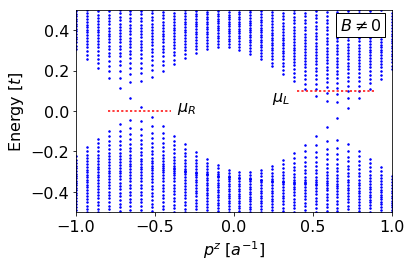

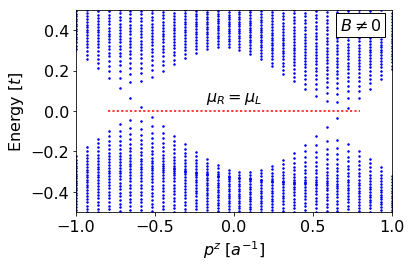

In [30]:
fsys_300 = diagonalizer.FinalizedSystem_1D(300)
params = copy(ParametersDefault)
params.lBinv2 = 1. / 30.**2
params.x_shift= (300 - 1.)/2.

evals, evecs = pSweep_1D(fsys_300, params, pzMin, pzMax, pCount=pzCount, yORzSweep = 'pzSweep')

plt = spectrum_plot_1D(evals,pzMin,pzMax,pzCount, ShowPlot = False)
plt.xlabel(r'$p^z \; [a^{-1}]$')
plt.ylabel(r'Energy $[t]$')
plt.ylim(-0.5, 0.5)
plt.text(0.8, 0.4, r'$B \neq 0$', horizontalalignment='center', bbox=dict(facecolor='white', alpha=1.))
plt.text(0.3, 0.05, r'$\mu_L$', horizontalalignment='center')
plt.plot((0.4, 0.9), (0.1, 0.1), 'r:')
plt.text(-0.3, 0., r'$\mu_R$', horizontalalignment='center')
plt.plot((-0.8, -0.4), (0., 0.), 'r:')
plt.tight_layout()
plt.savefig('images/QL_BBLSet2_occupation_imbalance.eps')
plt.show()

plt = spectrum_plot_1D(evals,pzMin,pzMax,pzCount, ShowPlot = False)
plt.xlabel(r'$p^z \; [a^{-1}]$')
plt.ylabel(r'Energy $[t]$')
plt.ylim(-0.5, 0.5)
plt.text(0.8, 0.4, r'$B \neq 0$', horizontalalignment='center', bbox=dict(facecolor='white', alpha=1.))
plt.text(0.0, 0.05, r'$\mu_R = \mu_L$', horizontalalignment='center')
plt.plot((-0.8, 0.8), (0., 0.), 'r:')
plt.tight_layout()
plt.savefig('images/QL_BBLSet2_equilibrium.eps')
plt.show()


del fsys_300, params, evals, evecs

In [13]:
pzStart = -0.560
pzEnd = 0.703

params = copy(ParametersDefault)
params.lBinv2 = 1. / 50.**2
params.x_shift= (800 - 1.)/2.

In [5]:
GridNumber = 5
for i in range(GridNumber):
    params.pz = pzStart + i * (pzEnd - pzStart) / (GridNumber-1)
    velocityCash = FermiVelocityZQL(fsys_1D, params, pyGuess = 0.2, pyGuess2 = 0.1, debug = True)
    print('{', params.pz, ',', velocityCash,sep='',end='},')

# del params, GridNumber, velocityCash

      converged: True
           flag: 'converged'
 function_calls: 13
     iterations: 12
           root: 0.11813050313717802
Energy = -1.20322745432e-06
Velocity calculated by approximate differentiation is 123.614226907
{-0.56,-0.680802070898},      converged: True
           flag: 'converged'
 function_calls: 4
     iterations: 3
           root: 0.1492460225352469
Energy = -2.51740214309e-05
Velocity calculated by approximate differentiation is -0.112275345609
{-0.24425000000000008,-0.0870889014595},      converged: True
           flag: 'converged'
 function_calls: 4
     iterations: 3
           root: 0.16264881190897212
Energy = -1.34671770611e-05
Velocity calculated by approximate differentiation is -0.0952797366921
{0.0714999999999999,-0.0817999802882},      converged: True
           flag: 'converged'
 function_calls: 4
     iterations: 3
           root: 0.17436619756978425
Energy = 4.96897404308e-06
Velocity calculated by approximate differentiation is -0.0535166072487
{0

In [6]:
GridNumber = 40
for i in range(GridNumber):
    params.pz = pzStart + i * (pzEnd - pzStart) / (GridNumber-1)
    velocityCash = FermiVelocityZQL(fsys_1D, params, pyGuess = 0.2, pyGuess2 = 0.1)
    print('{', params.pz, ',', velocityCash,sep='',end='},')

{-0.56,-0.681338566624},{-0.5276153846153847,-0.234626503097},{-0.4952307692307693,-0.149140693231},{-0.4628461538461539,-0.119774138583},{-0.43046153846153856,-0.105933213317},{-0.3980769230769231,-0.0983516176835},{-0.36569230769230776,-0.0938297807666},{-0.3333076923076924,-0.0909726058005},{-0.300923076923077,-0.0890944923712},{-0.2685384615384616,-0.0878165761618},{-0.23615384615384621,-0.0869149710565},{-0.20376923076923087,-0.0862492085952},{-0.17138461538461547,-0.0857264576548},{-0.13900000000000012,-0.0852823230201},{-0.10661538461538472,-0.0848699269768},{-0.07423076923076927,-0.0844533787212},{-0.04184615384615398,-0.0840036701721},{-0.009461538461538632,-0.0834959443419},{0.022923076923076824,-0.0829075284607},{0.05530769230769228,-0.0822163462505},{0.08769230769230763,-0.0813994265259},{0.12007692307692297,-0.0804312530745},{0.15246153846153832,-0.0792816661048},{0.18484615384615377,-0.0779129172683},{0.21723076923076912,-0.0762752589502},{0.24961538461538446,-0.074300027

## Several additional points, in order to make the approximation better

In [15]:
GridNumber = 40

params.pz = pzStart + 0.2 * (pzEnd - pzStart) / (GridNumber-1)
velocityCash = FermiVelocityZQL(fsys_1D, params, pyGuess = 0.2, pyGuess2 = 0.08)
print('{', params.pz, ',', velocityCash,sep='',end='},')

params.pz = pzStart + 0.4 * (pzEnd - pzStart) / (GridNumber-1)
velocityCash = FermiVelocityZQL(fsys_1D, params, pyGuess = 0.2, pyGuess2 = 0.08)
print('{', params.pz, ',', velocityCash,sep='',end='},')

params.pz = pzStart + 0.6 * (pzEnd - pzStart) / (GridNumber-1)
velocityCash = FermiVelocityZQL(fsys_1D, params, pyGuess = 0.2, pyGuess2 = 0.08)
print('{', params.pz, ',', velocityCash,sep='',end='},')

params.pz = pzStart + 0.8 * (pzEnd - pzStart) / (GridNumber-1)
velocityCash = FermiVelocityZQL(fsys_1D, params, pyGuess = 0.2, pyGuess2 = 0.08)
print('{', params.pz, ',', velocityCash,sep='',end='},')

params.pz = pzStart + 1.5 * (pzEnd - pzStart) / (GridNumber-1)
velocityCash = FermiVelocityZQL(fsys_1D, params, pyGuess = 0.2, pyGuess2 = 0.08)
print('{', params.pz, ',', velocityCash,sep='',end='},')

del params, pzStart, pzEnd, GridNumber, velocityCash

{-0.553523076923077,-0.532383482466},{-0.5470461538461538,-0.409647923916},{-0.5405692307692308,-0.327422487127},{-0.5340923076923078,-0.272678583942},{-0.511423076923077,-0.178738632587},

## Deformed boundary

In [17]:
pzStart = -0.560
pzEnd = 0.703

params = copy(ParametersDefault)
params.Rescale_b0_0 = 10.0
params.lBinv2 = 1. / 50.**2


GridNumber = 5
for i in range(GridNumber):
    params.pz = pzStart + i * (pzEnd - pzStart) / (GridNumber-1)
    velocityCash = FermiVelocityZQL(fsys_1D, params, pyGuess = 0.25, pyGuess2 = 0.08, debug = True)
    print('{', params.pz, ',', velocityCash,sep='',end='},')

# del params, GridNumber, velocityCash

      converged: True
           flag: 'converged'
 function_calls: 14
     iterations: 13
           root: 0.10570780805069095
Energy = -6.31733475439e-06
Velocity calculated by approximate differentiation is -0.546765354724
{-0.56,-0.503474847397},      converged: True
           flag: 'converged'
 function_calls: 5
     iterations: 4
           root: 0.10336331824751809
Energy = 2.88364063517e-07
Velocity calculated by approximate differentiation is -0.244512743772
{-0.24425000000000008,-0.24558868023},      converged: True
           flag: 'converged'
 function_calls: 5
     iterations: 4
           root: 0.17969068217489703
Energy = -3.37665846214e-06
Velocity calculated by approximate differentiation is -0.459967665475
{0.0714999999999999,-0.456284977921},      converged: True
           flag: 'converged'
 function_calls: 5
     iterations: 4
           root: 0.2240780241858078
Energy = -1.70969746617e-05
Velocity calculated by approximate differentiation is 0.00358894968184
{0.3

In [20]:
pzStart = -0.560
pzEnd = 0.703

params = copy(ParametersDefault)
params.Rescale_b0_0 = 10.0
params.lBinv2 = 1. / 50.**2

GridNumber = 40
for i in range(GridNumber):
    params.pz = pzStart + i * (pzEnd - pzStart) / (GridNumber-1)
    velocityCash = FermiVelocityZQL(fsys_1D, params, pyGuess = 0.25, pyGuess2 = 0.08)
    print('{', params.pz, ',', velocityCash,sep='',end='},')

{-0.56,-0.571315138712},{-0.5276153846153847,0.223498493445},{-0.4952307692307693,0.1812854119},{-0.4628461538461539,0.131237625162},{-0.43046153846153856,0.0777251680917},{-0.3980769230769231,0.0222296232771},{-0.36569230769230776,-0.034371590265},{-0.3333076923076924,-0.0913463217061},{-0.300923076923077,-0.147993366687},{-0.2685384615384616,-0.203559025806},{-0.23615384615384621,-0.257186900761},{-0.20376923076923087,-0.307895507704},{-0.17138461538461547,-0.354563551456},{-0.13900000000000012,-0.395940192046},{-0.10661538461538472,-0.430691001848},{-0.07423076923076927,-0.457490373097},{-0.04184615384615398,-0.475160235252},{-0.009461538461538632,-0.4828333167},{0.022923076923076824,-0.480100827673},{0.05530769230769228,-0.46708277039},{0.08769230769230763,-0.444407003963},{0.12007692307692297,-0.413090687646},{0.15246153846153832,-0.374379731514},{0.18484615384615377,-0.329592348681},{0.21723076923076912,-0.279999672678},{0.24961538461538446,-0.226765776316},{0.2819999999999998,-0

In [21]:
GridNumber = 40

params.pz = pzStart + 0.2 * (pzEnd - pzStart) / (GridNumber-1)
velocityCash = FermiVelocityZQL(fsys_1D, params, pyGuess = 0.25, pyGuess2 = 0.08)
print('{', params.pz, ',', velocityCash,sep='',end='},')

params.pz = pzStart + 0.4 * (pzEnd - pzStart) / (GridNumber-1)
velocityCash = FermiVelocityZQL(fsys_1D, params, pyGuess = 0.25, pyGuess2 = 0.08)
print('{', params.pz, ',', velocityCash,sep='',end='},')

params.pz = pzStart + 0.6 * (pzEnd - pzStart) / (GridNumber-1)
velocityCash = FermiVelocityZQL(fsys_1D, params, pyGuess = 0.25, pyGuess2 = 0.08)
print('{', params.pz, ',', velocityCash,sep='',end='},')

params.pz = pzStart + 0.8 * (pzEnd - pzStart) / (GridNumber-1)
velocityCash = FermiVelocityZQL(fsys_1D, params, pyGuess = 0.25, pyGuess2 = 0.08)
print('{', params.pz, ',', velocityCash,sep='',end='},')

params.pz = pzStart + 1.5 * (pzEnd - pzStart) / (GridNumber-1)
velocityCash = FermiVelocityZQL(fsys_1D, params, pyGuess = 0.25, pyGuess2 = 0.08)
print('{', params.pz, ',', velocityCash,sep='',end='},')

del params, pzStart, pzEnd, GridNumber, velocityCash

{-0.553523076923077,0.177754842194},{-0.5470461538461538,0.22713957709},{-0.5405692307692308,0.232375212466},{-0.5340923076923078,0.229352021418},{-0.511423076923077,0.204017420553},